<a href="https://colab.research.google.com/github/g7mack/Machine-Learning-Engineering/blob/main/MLE_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MANE 4961: Machine Learning for Engineering HW 2**

Gavin MacKenzie: Solutions (662020762)

## **1**. Use the Iris dataset and the SVM code shown in the first class. Define two new features using the original four features and then calculate the accuracy score of classification. The SVM classifier must use the new features and none of the original features for classification.

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

# Add the first two features together and second two features together
new_feature_1 = iris.data[:, 0] + iris.data[:, 1]
new_feature_2 = iris.data[:, 2] + iris.data[:, 3]

# Combine the new features into X matrix
X = np.vstack((new_feature_1, new_feature_2)).T
y = iris.target

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)
print()

print('actual iris species')
print(y_test)
print()

acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

[1 1 1 1 0 2 2 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]

actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]

accuracy score : 0.9666666666666667


## **2.** Classify only the even numbered handwritten digits using MNIST digits dataset with a k-nearest neighbors classifier. The classifier must not see any odd numbered digit images as inputs. The classifier must also consider every pixel in the input image to make its classification decision. Can we use pairplot to visualize this data?. Plot the the classification results using a heatmap showing digits which were correctly classified and digits which were not correctly classified. How many 6’s in your test set were correctly classified?


Accuracy score for even digits: 0.987870424171993


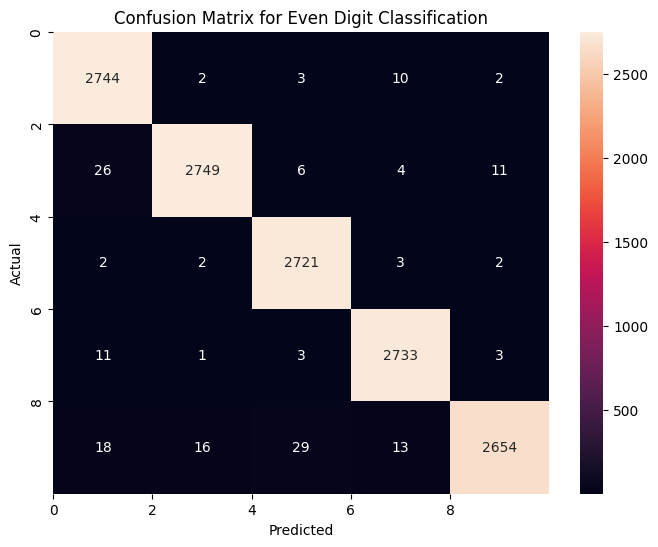

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST digits dataset from Keras
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# Combine training and testing data for filtering
X_full = np.concatenate((X_train_full, X_test_full), axis=0)
y_full = np.concatenate((y_train_full, y_test_full), axis=0)

# Reshape the image data from 28x28 to 784
X_full = X_full.reshape(X_full.shape[0], -1)

# Filter data for even digits
even_digits = np.isin(y_full, [0, 2, 4, 6, 8])
X = X_full[even_digits]
y = y_full[even_digits]


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y
)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

preds = knn.predict(X_test)

# Calculate the accuracy score
acc = accuracy_score(y_test, preds)
print('Accuracy score for even digits:', acc)

# Plot confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Even Digit Classification')
plt.xticks(ticks=np.arange(len(np.unique(y))), labels=np.unique(y))
plt.yticks(ticks=np.arange(len(np.unique(y))), labels=np.unique(y))
plt.show()

The MNIST digit data has 784 pixels, meaning it has 784 features. Visualizing all possible pairs of these 784 features would mean creating 784 * 783 / 2 = 306936 unique scatterplots. This large number of plots theoretically could be made, but would be overwhelming. Therefore, a pairplot is not suitable for visualizing the data.

As seen in the confusion matrix, 2733 6's were correctly classified.

## **3.** Cluster the Iris species by writing your own k-means algorithm using THREE features (Or modify the algorithm we used in class). Show visualization of the data using a THREE dimensional scatter plot. Compare the clustering performance of your k-means algorithm to the sklearn implementation by making plots of the clusters from your method and Scikit’s implementation by showing the clusters from your methods and from Scikit’s method. What happens when you vary the number of clusters?

In [21]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = load_iris()

df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]

X = df.to_numpy() # These are our features

df['target'] = data['target']

named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])


df['species_name'] = named_targets


X_train, X_test =train_test_split(
    X,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)

y = df['target'].to_numpy()

X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

# tag points with train or test labels

tag = []

for _ in range(X.shape[0]):
    if _ in idx_train:
        tag.append('train')
    else:
        tag.append('test')

print(tag)
df['tag'] = tag

['train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'test', 'test', 'test', 'test', 'train', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train'

In [22]:
#Create kmeans algorithm
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

In [23]:
#apply kmeans alg
model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

df['kmeans_labels'] = model.predict(X)


predicted_labels: [2 0 2 0 0 1 1 2 1 1 0 1 0 1 2 1 2 2 1 1 1 1 1 2 1 2 0 1 0 0 0 0 2 2 2 2 2
 0 0 1 0 2 2 0 2]
cluster centroids: [[6.77857143 3.02857143 5.62142857]
 [5.04285714 3.43428571 1.48857143]
 [5.82619048 2.72142857 4.35238095]]


In [25]:
#use scikit kmeans alg
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)

skmodel.predict(X_test)

skmodel_labels = skmodel.predict(X)

df['skmodel_labels'] = skmodel_labels

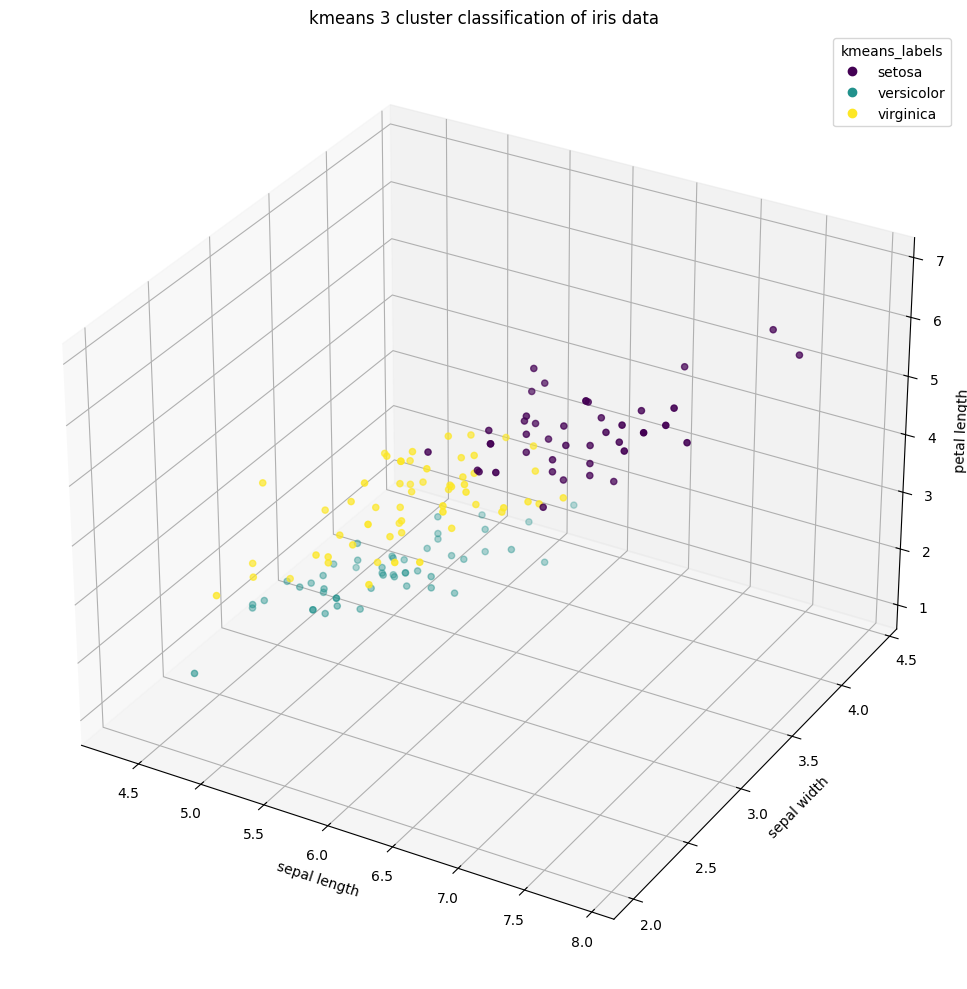

In [26]:
#Plot kmeans results
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
scatter = ax.scatter(df['sepal length'].to_list(), df['sepal width'].to_list(), df['petal length'].to_list(), c=df['kmeans_labels'].to_list())
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.title('kmeans 3 cluster classification of iris data')
legend_labels = [data.target_names[i] for i in sorted(df['kmeans_labels'].unique())]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='kmeans_labels')
plt.tight_layout()
plt.show()

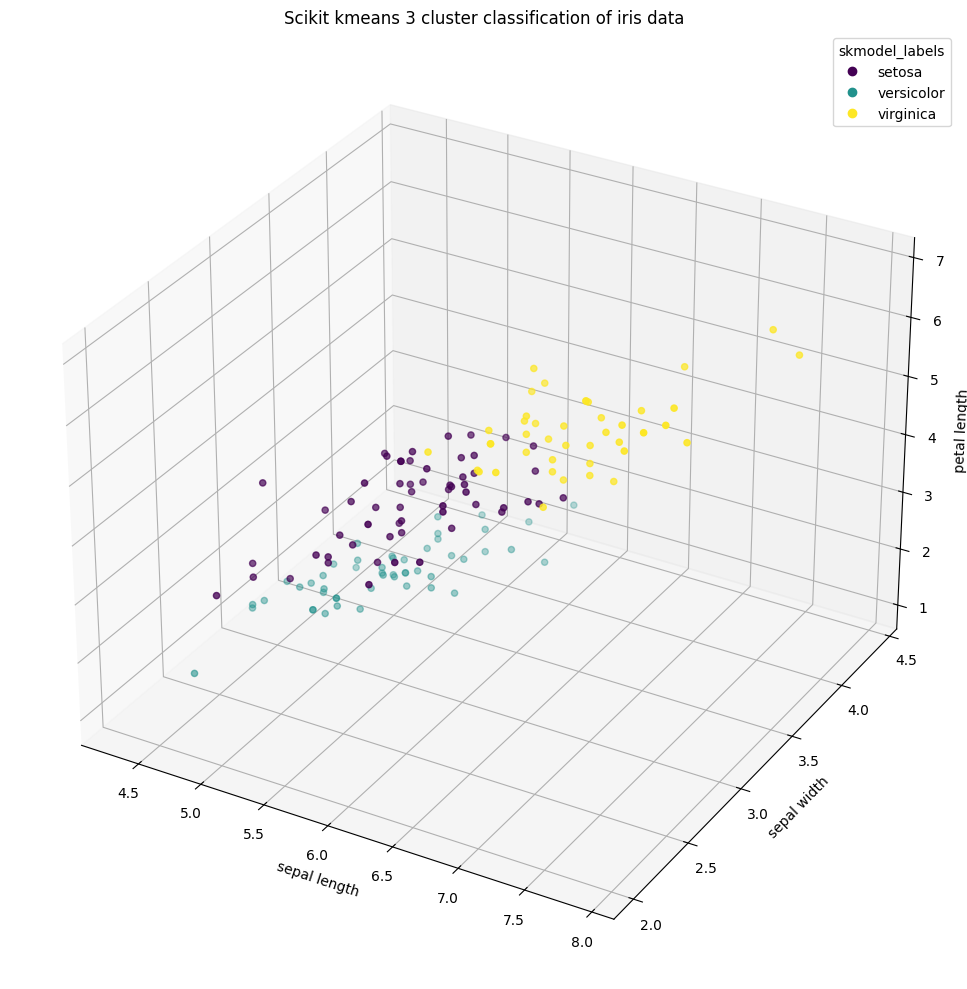

In [27]:
#Plot scikit results
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
scatter = ax.scatter(df['sepal length'].to_list(), df['sepal width'].to_list(), df['petal length'].to_list(), c=df['skmodel_labels'].to_list())
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.title('Scikit kmeans 3 cluster classification of iris data')
legend_labels = [data.target_names[i] for i in sorted(df['skmodel_labels'].unique())]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='skmodel_labels')
plt.tight_layout()
plt.show()

Changing the number of clusters changes the number of groups the algorithm tries to sort the data into. 2 clusters results in 2 different colors (groups) the data is categorized in, 4 results in 4 different, and so on. In this case, we want to use 3 since the input data is from 3 different species of flowers, but if we only used data from 2 of the species, we would want to reduce the number of clusters to match.